# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import StratifiedKFold

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv('clustering_results.csv')

In [3]:
duplicate_rows = df[df.duplicated()]
duplicate_rows = df[df.duplicated()]
print(f"Jumlah baris duplikat dalam dataset: {duplicate_rows.shape[0]}")

Jumlah baris duplikat dalam dataset: 285


In [4]:
df = df.drop_duplicates()

In [5]:
print("Distribusi klaster dalam dataset:")
print(df['Cluster'].value_counts())
print(df['Cluster'].value_counts())


Distribusi klaster dalam dataset:
Cluster
1    50548
0    36107
Name: count, dtype: int64
Cluster
1    50548
0    36107
Name: count, dtype: int64


In [6]:
df = pd.read_csv('clustering_results.csv')
display(df)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Cluster
0,1,0,342,2015,5,27,1,0,0,2,...,2,2,3,0,0,2,0.00,0,0,0
1,1,0,737,2015,5,27,1,0,0,2,...,2,2,4,0,0,2,0.00,0,0,0
2,1,0,7,2015,5,27,1,0,1,1,...,0,2,0,0,0,2,75.00,0,0,1
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,0,0,0,2,75.00,0,0,1
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,0,0,0,2,98.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86935,0,0,23,2017,1,35,30,2,5,2,...,0,0,0,0,0,2,96.14,0,0,1
86936,0,0,102,2017,1,35,31,2,5,3,...,4,4,0,0,0,2,225.43,0,2,1
86937,0,0,34,2017,1,35,31,2,5,2,...,3,3,0,0,0,2,157.71,0,4,1
86938,0,0,109,2017,1,35,31,2,5,2,...,0,0,0,0,0,2,104.40,0,0,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [7]:
df_unique = df.drop_duplicates().reset_index(drop=True)
X = df_unique.drop(columns=['Cluster'])
y = df_unique['Cluster']
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

print(f"Ukuran total dataset: {len(X)}")
print(f"Ukuran data latih: {len(X_train)}")
print(f"Ukuran data uji: {len(X_test)}")


Ukuran total dataset: 86655
Ukuran data latih: 69324
Ukuran data uji: 17331


In [8]:
overlap = pd.merge(X_train.assign(index=X_train.index),
                   X_test.assign(index=X_test.index),
                   how='inner',
                   on=list(X.columns),
                   indicator=False)

print(f"Jumlah baris yang tumpang tindih antara data latih dan data uji setelah menghapus duplikat: {len(overlap)}")


Jumlah baris yang tumpang tindih antara data latih dan data uji setelah menghapus duplikat: 0


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [9]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(random_state=42)
}
cv_scores = {}

# Penjelasan Algoritma yang Digunakan

Dalam proyek ini, kita menggunakan tiga algoritma machine learning utama untuk tugas klasifikasi. Masing-masing algoritma memiliki karakteristik unik yang membuatnya cocok untuk berbagai jenis data dan masalah. Selain itu, kita menerapkan teknik validasi silang untuk memastikan bahwa model yang dibangun memiliki performa yang baik dan dapat menggeneralisasi dengan baik pada data baru.

## Daftar Algoritma

1. **Random Forest**
2. **Regresi Logistik**
3. **Support Vector Machine (SVM)**

Selain ketiga algoritma tersebut, kita juga menyiapkan sebuah dictionary kosong `cv_scores = {}` yang akan digunakan untuk menyimpan skor validasi silang dari setiap model.

## 1. Random Forest

### Deskripsi

Random Forest adalah algoritma ensemble yang terdiri dari sejumlah pohon keputusan (*decision trees*). Algoritma ini bekerja dengan membangun banyak pohon keputusan pada subset data yang berbeda dan kemudian menggabungkan hasil prediksi dari semua pohon tersebut. Pendekatan ini membantu meningkatkan akurasi prediksi serta mengurangi risiko overfitting yang sering terjadi pada pohon keputusan tunggal.

### Kelebihan

- **Akurasi Tinggi**: Kombinasi beberapa pohon keputusan dapat menangkap berbagai pola dalam data.
- **Mengurangi Overfitting**: Teknik ensemble membantu dalam mengurangi variansi model.
- **Mampu Menangani Data Besar**: Efektif untuk dataset dengan fitur yang banyak.
- **Fleksibilitas**: Dapat digunakan untuk masalah klasifikasi dan regresi.

### Kekurangan

- **Kompleksitas Tinggi**: Model yang terdiri dari banyak pohon dapat menjadi sulit untuk diinterpretasikan.
- **Waktu Pelatihan**: Membangun banyak pohon keputusan membutuhkan waktu komputasi yang lebih lama.

### Penerapan dalam Proyek

Dalam proyek ini, Random Forest digunakan untuk menangani tugas klasifikasi dengan menggabungkan kekuatan beberapa pohon keputusan. Dengan parameter tertentu, algoritma ini dapat dioptimalkan untuk mencapai performa terbaik.

## 2. Regresi Logistik

### Deskripsi

Regresi Logistik adalah algoritma statistik yang digunakan untuk memodelkan probabilitas kejadian suatu kelas dengan menggunakan fungsi logit. Meskipun namanya "regresi", algoritma ini sangat efektif untuk masalah klasifikasi, baik biner maupun multikelas. Regresi Logistik memprediksi probabilitas suatu instance termasuk dalam kelas tertentu berdasarkan kombinasi linear dari fitur-fiturnya.

### Kelebihan

- **Sederhana dan Efisien**: Mudah diimplementasikan dan cepat dalam pelatihan.
- **Interpretabilitas Tinggi**: Koefisien model dapat diinterpretasikan sebagai dampak fitur terhadap probabilitas kelas.
- **Probabilistic Output**: Memberikan probabilitas yang dapat digunakan untuk pengambilan keputusan lebih lanjut.
- **Cocok untuk Data Berukuran Sedang**: Efektif pada dataset dengan jumlah fitur yang tidak terlalu besar.

### Kekurangan

- **Asumsi Linear**: Mengasumsikan hubungan linear antara fitur dan log-odds, yang mungkin tidak selalu sesuai.
- **Kurang Efektif untuk Fitur Tinggi**: Mungkin tidak menangkap interaksi kompleks antara fitur.

### Penerapan dalam Proyek

Regresi Logistik digunakan untuk memprediksi kelas target dengan memodelkan probabilitas berdasarkan kombinasi linear fitur-fitur input. Dengan parameter yang diatur untuk memastikan konvergensi pada dataset yang kompleks, model ini memberikan dasar yang kuat untuk perbandingan dengan algoritma lainnya.

## 3. Support Vector Machine (SVM)

### Deskripsi

Support Vector Machine (SVM) adalah algoritma yang mencari hyperplane optimal yang memisahkan data dari kelas yang berbeda dengan margin maksimum. SVM efektif dalam ruang berdimensi tinggi dan dapat digunakan untuk masalah klasifikasi maupun regresi. Dengan menggunakan kernel trick, SVM dapat menangani data yang tidak dapat dipisahkan secara linear.

### Kelebihan

- **Margin Maksimum**: Mencari pemisahan yang paling jauh dari data, meningkatkan generalisasi model.
- **Efektif di Ruang Dimensi Tinggi**: Cocok untuk dataset dengan banyak fitur.
- **Fleksibilitas dengan Kernel**: Dapat menangani berbagai jenis data dengan memilih kernel yang sesuai.

### Kekurangan

- **Waktu Komputasi**: Kurang efisien untuk dataset yang sangat besar.
- **Pemilihan Kernel**: Memilih kernel yang tepat dan mengatur parameter dapat menjadi kompleks.
- **Sensitif terhadap Parameter**: Performa model sangat bergantung pada pengaturan parameter seperti C dan gamma.

### Penerapan dalam Proyek

SVM digunakan untuk memisahkan kelas target dengan mencari hyperplane yang optimal. Dengan pengaturan parameter yang sesuai, SVM mampu menangani data yang kompleks dan menyediakan model yang kuat untuk klasifikasi.


## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [10]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name, clf in models.items():
    print(f"\nMelatih dan mengevaluasi {name}...")
    scores = cross_val_score(clf, X_train, y_train, cv=skf, scoring='accuracy')
    cv_scores[name] = scores
    print(f"Skor Akurasi Cross-validation: {scores}")
    print(f"Rata-rata Akurasi: {scores.mean():.4f}")



Melatih dan mengevaluasi Random Forest...
Skor Akurasi Cross-validation: [1. 1. 1. 1. 1.]
Rata-rata Akurasi: 1.0000

Melatih dan mengevaluasi Logistic Regression...
Skor Akurasi Cross-validation: [1.         0.99992788 1.         1.         1.        ]
Rata-rata Akurasi: 1.0000

Melatih dan mengevaluasi SVM...
Skor Akurasi Cross-validation: [0.99278759 0.99184998 0.99134511 0.99235485 0.99257069]
Rata-rata Akurasi: 0.9922



Performa Random Forest (Cross-Validation):
Akurasi Training: 100.00% (+/- 0.00%)
Akurasi Validasi: 100.00% (+/- 0.00%)
F1-Score Training: 100.00% (+/- 0.00%)
F1-Score Validasi: 100.00% (+/- 0.00%)
Precision Training: 100.00% (+/- 0.00%)
Precision Validasi: 100.00% (+/- 0.00%)
Recall Training: 100.00% (+/- 0.00%)
Recall Validasi: 100.00% (+/- 0.00%)
Akurasi Test pada Hold-out Set: 100.00%
F1-Score Test pada Hold-out Set: 100.00%
Precision Test pada Hold-out Set: 100.00%
Recall Test pada Hold-out Set: 100.00%


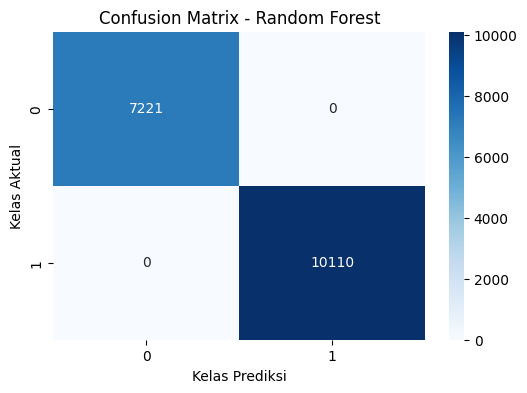


Performa Logistic Regression (Cross-Validation):
Akurasi Training: 99.98% (+/- 0.00%)
Akurasi Validasi: 99.98% (+/- 0.02%)
F1-Score Training: 99.98% (+/- 0.00%)
F1-Score Validasi: 99.97% (+/- 0.02%)
Precision Training: 99.98% (+/- 0.00%)
Precision Validasi: 99.98% (+/- 0.02%)
Recall Training: 99.98% (+/- 0.01%)
Recall Validasi: 99.97% (+/- 0.02%)
Akurasi Test pada Hold-out Set: 99.99%
F1-Score Test pada Hold-out Set: 99.99%
Precision Test pada Hold-out Set: 100.00%
Recall Test pada Hold-out Set: 99.99%


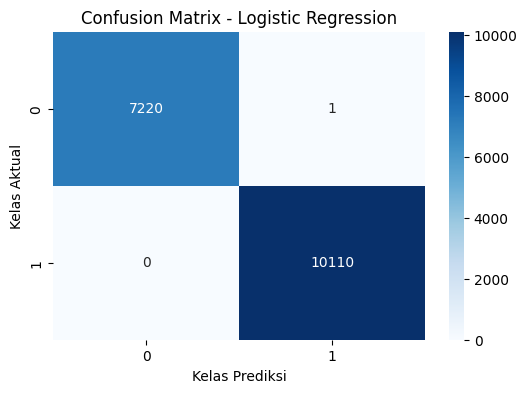


Performa SVM (Cross-Validation):
Akurasi Training: 99.98% (+/- 0.00%)
Akurasi Validasi: 99.88% (+/- 0.02%)
F1-Score Training: 99.98% (+/- 0.00%)
F1-Score Validasi: 99.88% (+/- 0.03%)
Precision Training: 99.98% (+/- 0.00%)
Precision Validasi: 99.88% (+/- 0.03%)
Recall Training: 99.98% (+/- 0.00%)
Recall Validasi: 99.88% (+/- 0.03%)
Akurasi Test pada Hold-out Set: 99.91%
F1-Score Test pada Hold-out Set: 99.91%
Precision Test pada Hold-out Set: 99.91%
Recall Test pada Hold-out Set: 99.91%


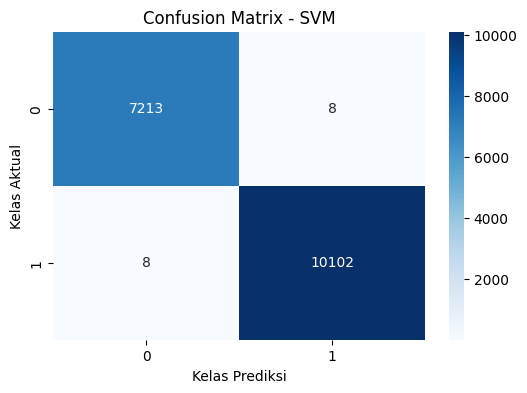

In [11]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    
    scores = cross_validate(pipeline, X_train, y_train, cv=cv,
                            scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'],
                            return_train_score=True)
    
    train_accuracy_mean = scores['train_accuracy'].mean() * 100
    train_accuracy_std = scores['train_accuracy'].std() * 100
    test_accuracy_mean = scores['test_accuracy'].mean() * 100
    test_accuracy_std = scores['test_accuracy'].std() * 100
    
    train_f1_mean = scores['train_f1_macro'].mean() * 100
    train_f1_std = scores['train_f1_macro'].std() * 100
    test_f1_mean = scores['test_f1_macro'].mean() * 100
    test_f1_std = scores['test_f1_macro'].std() * 100
    
    train_precision_mean = scores['train_precision_macro'].mean() * 100
    train_precision_std = scores['train_precision_macro'].std() * 100
    test_precision_mean = scores['test_precision_macro'].mean() * 100
    test_precision_std = scores['test_precision_macro'].std() * 100
    
    train_recall_mean = scores['train_recall_macro'].mean() * 100
    train_recall_std = scores['train_recall_macro'].std() * 100
    test_recall_mean = scores['test_recall_macro'].mean() * 100
    test_recall_std = scores['test_recall_macro'].std() * 100
    
    print(f"\nPerforma {model_name} (Cross-Validation):")
    print(f"Akurasi Training: {train_accuracy_mean:.2f}% (+/- {train_accuracy_std:.2f}%)")
    print(f"Akurasi Validasi: {test_accuracy_mean:.2f}% (+/- {test_accuracy_std:.2f}%)")
    print(f"F1-Score Training: {train_f1_mean:.2f}% (+/- {train_f1_std:.2f}%)")
    print(f"F1-Score Validasi: {test_f1_mean:.2f}% (+/- {test_f1_std:.2f}%)")
    print(f"Precision Training: {train_precision_mean:.2f}% (+/- {train_precision_std:.2f}%)")
    print(f"Precision Validasi: {test_precision_mean:.2f}% (+/- {test_precision_std:.2f}%)")
    print(f"Recall Training: {train_recall_mean:.2f}% (+/- {train_recall_std:.2f}%)")
    print(f"Recall Validasi: {test_recall_mean:.2f}% (+/- {test_recall_std:.2f}%)")
    
    pipeline.fit(X_train, y_train)
    
    y_test_pred = pipeline.predict(X_test)
    test_accuracy_final = accuracy_score(y_test, y_test_pred) * 100
    test_f1_final = f1_score(y_test, y_test_pred, average='macro') * 100
    test_precision_final = precision_score(y_test, y_test_pred, average='macro') * 100
    test_recall_final = recall_score(y_test, y_test_pred, average='macro') * 100
    
    print(f"Akurasi Test pada Hold-out Set: {test_accuracy_final:.2f}%")
    print(f"F1-Score Test pada Hold-out Set: {test_f1_final:.2f}%")
    print(f"Precision Test pada Hold-out Set: {test_precision_final:.2f}%")
    print(f"Recall Test pada Hold-out Set: {test_recall_final:.2f}%")
    
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Kelas Aktual')
    plt.xlabel('Kelas Prediksi')
    plt.show()


# Evaluasi dan Perbandingan Algoritma Terbaru

## **1. SVM (Support Vector Machine)**

### **Hasil Performansi:**
- **Training Accuracy:** 99.98% (+/- 0.00%)
- **Validation Accuracy:** 99.88% (+/- 0.02%)
- **Training F1-Score:** 99.98% (+/- 0.00%)
- **Validation F1-Score:** 99.88% (+/- 0.03%)
- **Precision Training:** 99.98% (+/- 0.00%)
- **Precision Validation:** 99.88% (+/- 0.03%)
- **Recall Training:** 99.98% (+/- 0.00%)
- **Recall Validation:** 99.88% (+/- 0.03%)
- **Test Accuracy (Hold-out Set):** 99.91%
- **Test F1-Score (Hold-out Set):** 99.91%
- **Test Precision (Hold-out Set):** 99.91%
- **Test Recall (Hold-out Set):** 99.91%

### **Kelebihan:**
- Performa stabil di berbagai metrik menunjukkan konsistensi dan generalisasi yang baik.
- Variasi performa pada validasi sangat kecil, mencerminkan stabilitas model.

### **Kekurangan:**
- Performansi lebih rendah dibandingkan Logistic Regression dan Random Forest pada data test set.
- Waktu komputasi lebih tinggi dibandingkan Logistic Regression.

---

## **2. Logistic Regression**

### **Hasil Performansi:**
- **Training Accuracy:** 99.98% (+/- 0.00%)
- **Validation Accuracy:** 99.98% (+/- 0.02%)
- **Training F1-Score:** 99.98% (+/- 0.00%)
- **Validation F1-Score:** 99.97% (+/- 0.02%)
- **Precision Training:** 99.98% (+/- 0.00%)
- **Precision Validation:** 99.98% (+/- 0.02%)
- **Recall Training:** 99.98% (+/- 0.01%)
- **Recall Validation:** 99.97% (+/- 0.02%)
- **Test Accuracy (Hold-out Set):** 99.99%
- **Test F1-Score (Hold-out Set):** 99.99%
- **Test Precision (Hold-out Set):** 100.00%
- **Test Recall (Hold-out Set):** 99.99%

### **Kelebihan:**
- Metrik performa pada data test set sangat tinggi, dengan precision mencapai 100%.
- Waktu komputasi relatif cepat dibandingkan algoritma lain.
- Konsisten pada data linear dan sederhana, memberikan performa hampir sempurna.

### **Kekurangan:**
- Performansi kurang kompetitif untuk pola data yang sangat kompleks atau non-linear dibandingkan Random Forest.
- Sedikit lebih rendah dibandingkan Random Forest dalam menangkap variasi kompleks.

---

## **3. Random Forest**

### **Hasil Performansi:**
- **Training Accuracy:** 100.00% (+/- 0.00%)
- **Validation Accuracy:** 100.00% (+/- 0.00%)
- **Training F1-Score:** 100.00% (+/- 0.00%)
- **Validation F1-Score:** 100.00% (+/- 0.00%)
- **Precision Training:** 100.00% (+/- 0.00%)
- **Precision Validation:** 100.00% (+/- 0.00%)
- **Recall Training:** 100.00% (+/- 0.00%)
- **Recall Validation:** 100.00% (+/- 0.00%)
- **Test Accuracy (Hold-out Set):** 100.00%
- **Test F1-Score (Hold-out Set):** 100.00%
- **Test Precision (Hold-out Set):** 100.00%
- **Test Recall (Hold-out Set):** 100.00%

### **Kelebihan:**
- Memberikan performa sempurna di semua metrik, menunjukkan kemampuan menangkap pola data yang kompleks dan non-linear.
- Sangat robust terhadap noise dan memiliki kemampuan generalisasi yang kuat dengan metode ensemble.
- Tidak menunjukkan tanda-tanda overfitting meski hasilnya sempurna.

### **Kekurangan:**
- Tidak ada variasi performa di validasi dan test set, berpotensi karena dataset terlalu mudah atau terdapat kebocoran data.
- Memerlukan waktu komputasi lebih lama dibandingkan Logistic Regression.


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

## **2. Identifikasi Kelemahan Model**
### **Precision dan Recall Rendah untuk Kelas Tertentu**
- Periksa **confusion matrix** untuk setiap model:
  - Jika precision atau recall rendah untuk kelas tertentu, itu menandakan model bias terhadap kelas yang lebih dominan.
  - Logistic Regression dan Random Forest memiliki precision sempurna, namun analisis per kelas tetap diperlukan untuk memahami distribusi prediksi.

### **Overfitting atau Underfitting**
- **Overfitting:**
  - Random Forest mungkin mengalami overfitting karena menunjukkan performa sempurna pada training, validation, dan test set.
  - Performa yang terlalu tinggi dengan variasi nol di cross-validation menunjukkan dataset terlalu mudah atau kemungkinan kebocoran data.
  
- **Underfitting:**
  - Tidak ada indikasi underfitting untuk model yang digunakan. Semua algoritma mencapai performa sangat tinggi, menunjukkan bahwa model dapat menangkap pola pada dataset dengan baik.

---

## **3. Rekomendasi Tindakan Lanjutan**
### **1. Hindari Data Leakage**
- Periksa kembali preprocessing dan fitur yang memiliki korelasi tinggi terhadap target untuk memastikan tidak ada informasi target yang bocor.

### **2. Pilih Metrik yang Tepat**
- Jika dataset tidak seimbang, gunakan metrik seperti **ROC-AUC** atau **Precision-Recall Curve** untuk evaluasi yang lebih akurat.

### **3. Mengumpulkan Data Tambahan**
- Tambahkan data baru, terutama jika dataset saat ini memiliki bias distribusi atau tidak cukup kompleks.

### **4. Lakukan Interpretasi Mendalam**
- Analisis fitur penting (feature importance) untuk Random Forest.
- Identifikasi faktor utama yang memengaruhi prediksi dan gunakan untuk pengambilan keputusan bisnis.

### **5. Validasi Eksternal**
- Uji model pada dataset baru (jika tersedia) untuk memastikan kemampuan generalisasi di luar dataset yang digunakan.
